In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf 


2023-03-31 11:17:44.233957: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
# Data Generation 
observations=1000

In [3]:
#Declaring input variables
xs=np.random.uniform(low=-10,high=10,size=(observations,1))
zs=np.random.uniform(-10,10,(observations,1))
#Combine the two dimensions of the input into one input matrix.
generated_inputs=np.column_stack((xs,zs))


In [4]:
#Add a random noise because real data is never perfect
noise=np.random.uniform(-1,1,(observations,1))
#Declaring the target variable
generated_targets= 2 * xs - 3 * zs + 5 +noise

In [5]:
#save into an npz fil called 'TF2_intro' 
np.savez('TF_intro',inputs=generated_inputs,targets=generated_targets)


In [6]:
#load the training data from NPZ
training_data=np.load('TF_intro.npz')


In [7]:
# Declare a variable where we will store the input size of our model 
# It should be equal to the number of variables you have
input_size=2
# Declare the output size of the model
# It should be equal to the number of outputs you've got (for regression that's usually 1)
output_size=1


In [8]:
#Outline the model
#We lay out the model in 'Sequential' 
model=tf.keras.Sequential([
    #Each layer is listed here
    #The method 'Dense' indicates our mathematical operations to be (xw+b)
    tf.keras.layers.Dense(output_size,
                          # there are extra arguments you can include to customize your model
                          kernel_initializer=tf.random_uniform_initializer(minval=-0.1,maxval=0.1),
                          bias_initializer=tf.random_uniform_initializer(minval=-0.1,maxval=0.1)

                          )
])

In [9]:
# We can also define a custom optimizer , where can specify the learning rate
custom_optimizer=tf.keras.optimizers.SGD(learning_rate=0.02)
# We can also define a custom loss function ,'compile' is the method where you select and indicate the optimizers and the loss
model.compile(optimizer=custom_optimizer,loss='mean_squared_error')

In [10]:
#Finally fitting the model
model.fit(training_data['inputs'],training_data['targets'],epochs=100,verbose=2)


Epoch 1/100
32/32 - 0s - loss: 23.4694 - 459ms/epoch - 14ms/step
Epoch 2/100
32/32 - 0s - loss: 1.1060 - 52ms/epoch - 2ms/step
Epoch 3/100
32/32 - 0s - loss: 0.4172 - 47ms/epoch - 1ms/step
Epoch 4/100
32/32 - 0s - loss: 0.3958 - 48ms/epoch - 2ms/step
Epoch 5/100
32/32 - 0s - loss: 0.3554 - 47ms/epoch - 1ms/step
Epoch 6/100
32/32 - 0s - loss: 0.3938 - 44ms/epoch - 1ms/step
Epoch 7/100
32/32 - 0s - loss: 0.4078 - 48ms/epoch - 2ms/step
Epoch 8/100
32/32 - 0s - loss: 0.4240 - 41ms/epoch - 1ms/step
Epoch 9/100
32/32 - 0s - loss: 0.3771 - 39ms/epoch - 1ms/step
Epoch 10/100
32/32 - 0s - loss: 0.3908 - 38ms/epoch - 1ms/step
Epoch 11/100
32/32 - 0s - loss: 0.4258 - 40ms/epoch - 1ms/step
Epoch 12/100
32/32 - 0s - loss: 0.3721 - 41ms/epoch - 1ms/step
Epoch 13/100
32/32 - 0s - loss: 0.3707 - 39ms/epoch - 1ms/step
Epoch 14/100
32/32 - 0s - loss: 0.3554 - 38ms/epoch - 1ms/step
Epoch 15/100
32/32 - 0s - loss: 0.4084 - 39ms/epoch - 1ms/step
Epoch 16/100
32/32 - 0s - loss: 0.3739 - 41ms/epoch - 1ms/ste

In [11]:
#Extract the weights and the biases
model.layers[0].get_weights()


[array([[ 2.0021565],
        [-3.0249288]], dtype=float32),
 array([5.025806], dtype=float32)]

In [12]:
weights=model.layers[0].get_weights()[0]
weights

array([[ 2.0021565],
       [-3.0249288]], dtype=float32)

In [13]:
biases=model.layers[0].get_weights()[1]
biases

array([5.025806], dtype=float32)

In [14]:
# Extract the output (make predictions)
model.predict_on_batch(training_data['inputs']).round(1)

2023-03-31 11:17:55.313422: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1000,2]
	 [[{{node Placeholder/_0}}]]


array([[ 41.8],
       [  0.5],
       [ 18.1],
       [ 23.8],
       [ 11.5],
       [ -2.5],
       [ -1.7],
       [ 10.1],
       [-31.1],
       [ -4. ],
       [  6.7],
       [-15. ],
       [ 34.9],
       [-32.2],
       [ -1.7],
       [ -8.1],
       [ 32.9],
       [ 11.9],
       [ 26.5],
       [-33.3],
       [ 19.5],
       [  7.2],
       [ -1.5],
       [  2.9],
       [ -9. ],
       [ 14.1],
       [ -8.7],
       [ -4.1],
       [  7.2],
       [ 11.3],
       [ 25.7],
       [ 17.2],
       [ 27.4],
       [ -6.9],
       [ 35. ],
       [-10.8],
       [  6.6],
       [-26. ],
       [  1.9],
       [-20.7],
       [ 44.2],
       [ 40.4],
       [-28.2],
       [ 38. ],
       [ 10.9],
       [  0.1],
       [ 41.3],
       [  9.6],
       [ 13.1],
       [ 13.7],
       [-19.6],
       [  9.3],
       [  9.9],
       [ 12.6],
       [-33.1],
       [ 48. ],
       [-22.5],
       [ -6.5],
       [ 17.8],
       [ -9.4],
       [ -4.3],
       [ 27.3],
       [

In [15]:
# Display the targets and comapre with the outputs and the targets
training_data['targets'].round(1)

array([[ 41.7],
       [  0.1],
       [ 17.7],
       [ 22.7],
       [ 11.1],
       [ -2.8],
       [ -1.5],
       [ 10.5],
       [-30.4],
       [ -4.4],
       [  6.4],
       [-15.6],
       [ 35.1],
       [-32.3],
       [ -2.3],
       [ -8.5],
       [ 32.6],
       [ 11.4],
       [ 25.6],
       [-32.7],
       [ 18.6],
       [  6.7],
       [ -1.4],
       [  2.5],
       [ -8.9],
       [ 13.8],
       [ -8.1],
       [ -3.4],
       [  8. ],
       [ 10.6],
       [ 25.2],
       [ 16.3],
       [ 26.3],
       [ -6.6],
       [ 35.3],
       [-11.4],
       [  5.7],
       [-25.8],
       [  1.4],
       [-21.5],
       [ 44. ],
       [ 39.6],
       [-27.1],
       [ 37.2],
       [ 10. ],
       [ -0.5],
       [ 41.8],
       [  8.9],
       [ 12.1],
       [ 13.2],
       [-19.7],
       [  8.6],
       [ 10.3],
       [ 11.6],
       [-32.6],
       [ 47. ],
       [-23.2],
       [ -6. ],
       [ 18. ],
       [ -8.9],
       [ -3.4],
       [ 27.3],
       [

2023-03-31 11:17:55.470360: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1000,2]
	 [[{{node Placeholder/_0}}]]


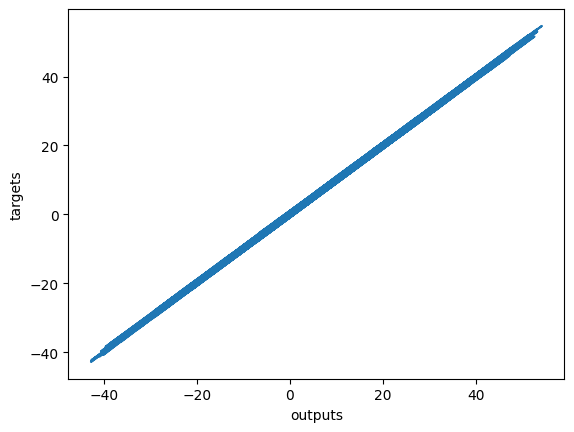

In [16]:
#Plotting the data 
plt.plot(np.squeeze(model.predict_on_batch(training_data['inputs'])),np.squeeze(training_data['targets']))
plt.xlabel('outputs')
plt.ylabel('targets')
plt.show()